In [4]:
import pandas as pd

invoice=pd.read_csv('fct_invoice.csv')

invoice

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [5]:
customers=pd.read_json('dim_customer.json')
customers=customers.rename(columns={'id':'customer_id'})
customers

,age,first_name,gender,customer_id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


## Easy
### 1. How many unique customers are in the dataset?

In [6]:
invoice['customer_id'].nunique()

5191

In [7]:
customers['customer_id'].nunique()

5191

### 2. What are the different categories of products available? How many unique categories are there?

In [8]:
invoice['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [9]:
len(invoice['category'].unique())

8

### 3. Which payment method is the most popular? How many times was it used?

In [10]:
invoice['payment_method'].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

In [11]:
(invoice['payment_method'].value_counts()).idxmax()

'Cash'

In [12]:
(invoice['payment_method'].value_counts()).max()

44447

## Medium
### 1. What are the three most popular categories, by total sales?

In [13]:
category_sales = invoice.groupby('category')['quantity'].sum()
sorted_categories = category_sales.sort_values(ascending=False)

print(sorted_categories)


category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Toys                30321
Shoes               30217
Technology          15021
Books               14982
Souvenir            14871
Name: quantity, dtype: int64


In [14]:
top_three_categories = sorted_categories.head(3)

print("The top three most popular categories by total sales are: ", top_three_categories)

The top three most popular categories by total sales are:  category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Name: quantity, dtype: int64


### 2. What are the total sales attributed to customers over the age of 45?

In [15]:
merged_table = pd.merge(invoice, customers, on='customer_id', how='inner')
merged_table

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,William,M,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,NaN,William,M,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,NaN,William,M,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,NaN,Melissa,F,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,36.0,Leslie,F,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,NaN,Kelly,F,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,Perez


In [16]:
filtered_age= merged_table[merged_table['age'] > 45]
total_sales= filtered_age['quantity'].sum()

print(total_sales)

97629


### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

C:\Users\reese\AppData\Local\Temp\ipykernel_5152\3645260565.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


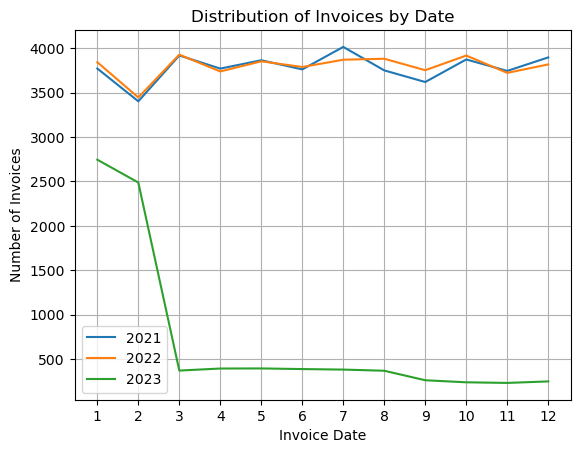

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fct_invoice.csv')  

df['invoice_date'] = pd.to_datetime(df['invoice_date'])

df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month

monthly_counts = df.groupby(['year', 'month']).size().unstack().fillna(0) 

fig, ax = plt.subplots() 

for year in [2021, 2022, 2023]:
    ax.plot(range(1, 13), monthly_counts.loc[year], label=str(year)) 
    
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.xlabel('Invoice Date')
plt.ylabel('Number of Invoices')
plt.title('Distribution of Invoices by Date')
plt.show()

## Hard
### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [2]:
import pandas as pd

file1 = pd.read_csv('fct_invoice.csv')
file2 = pd.read_json('dim_customer.json')
file2 = file2.rename(columns={'id':'customer_id'})

merged = pd.merge(file1, file2, on='customer_id', how='inner')
merged 

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,William,M,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,NaN,William,M,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,NaN,William,M,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,NaN,Melissa,F,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,36.0,Leslie,F,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,NaN,Kelly,F,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,Perez


In [6]:
merged['decade_age_range'] = pd.cut(merged['age'], bins=range(0, 101, 10),
                                labels=['{}-{}'.format(i, i+9) for i in range(0, 100, 10)])

pivot_table = pd.pivot_table(merged, values='quantity', index='category',
                             columns='decade_age_range', aggfunc='sum')

pivot_table

decade_age_range,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,,
Books,0,351,1443,1522,1471,1438,1354,1031,409,0
Clothing,0,2722,9233,10391,9996,9802,9080,7154,3401,0
Cosmetics,0,1178,3999,4865,4382,4214,3990,2884,1470,0
Food & Beverage,0,1067,3929,4651,4443,4106,3968,2894,1328,0
Shoes,0,638,2810,3181,3035,2832,2471,2134,951,0
Souvenir,0,458,1267,1487,1488,1352,1215,907,475,0
Technology,0,438,1313,1607,1518,1222,1386,964,400,0
Toys,0,748,2841,3259,2891,2747,2593,2179,983,0
